# PyTorch. Основы: синтаксис, torch.cuda и torch.autograd

## Задание 7.1

In [ ]:
import torch
import matplotlib.pyplot as plt

### Задача 1

1). Создайте два вещественных тензора: `a` размером (3, 4) и `b` размером (12,)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (2, 2, 3)  
3). Выведите первый столбец матрицы `a` с помощью индексации

In [ ]:
torch.random.manual_seed(239)

a = torch.rand(3, 4)
b = torch.rand(12)
c = b.reshape(2, 2, 3)

print(f'a = {a}\n')
print(f'b = {b}\n')
print(f'c = {c}\n')

print(f'Первый столбец а = {a[:, 0]}')

a = tensor([[0.3168, 0.9147, 0.2298, 0.5921],
        [0.8135, 0.4361, 0.2037, 0.8230],
        [0.6035, 0.6287, 0.1959, 0.8569]])

b = tensor([0.3975, 0.4105, 0.7435, 0.7007, 0.6471, 0.8885, 0.9868, 0.8606, 0.1485,
        0.0407, 0.0322, 0.8397])

c = tensor([[[0.3975, 0.4105, 0.7435],
         [0.7007, 0.6471, 0.8885]],

        [[0.9868, 0.8606, 0.1485],
         [0.0407, 0.0322, 0.8397]]])

Первый столбец а = tensor([0.3168, 0.8135, 0.6035])



### Задача 2

1). Создайте два вещественных тензора: `a` размером (5, 2) и `b` размером (1,10)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (5, 2)  
3). Произведите все арифметические операции с тензорами `a` и `c`

In [ ]:
a = torch.rand(5, 2)
b = torch.rand(1, 10)
c = b.reshape(5, 2)

print(f'a = {a}\n')
print(f'b = {b}\n')
print(f'c = {c}\n')

print(f'a + c = {a.add(c)}\n')
print(f'a - c = {a.sub(c)}\n')
print(f'a * c = {a.mul(c)}\n')
print(f'a / c = {a.div(c)}')

a = tensor([[0.4961, 0.9243],
        [0.4150, 0.3645],
        [0.7712, 0.3276],
        [0.2518, 0.7073],
        [0.1843, 0.2961]])

b = tensor([[0.9421, 0.9069, 0.2196, 0.5248, 0.8270, 0.2979, 0.9194, 0.6226, 0.5090,
         0.6028]])

c = tensor([[0.9421, 0.9069],
        [0.2196, 0.5248],
        [0.8270, 0.2979],
        [0.9194, 0.6226],
        [0.5090, 0.6028]])

a + c = tensor([[1.4382, 1.8312],
        [0.6346, 0.8893],
        [1.5982, 0.6254],
        [1.1712, 1.3300],
        [0.6933, 0.8989]])

a - c = tensor([[-0.4460,  0.0174],
        [ 0.1954, -0.1604],
        [-0.0558,  0.0297],
        [-0.6676,  0.0847],
        [-0.3247, -0.3067]])

a * c = tensor([[0.4674, 0.8383],
        [0.0911, 0.1913],
        [0.6378, 0.0976],
        [0.2315, 0.4404],
        [0.0938, 0.1785]])

a / c = tensor([[0.5266, 1.0192],
        [1.8899, 0.6945],
        [0.9325, 1.0997],
        [0.2739, 1.1360],
        [0.3620, 0.4912]])


### Задача 3

1). Создайте тензор *целых чисел* `images` размерности (100, 200, 200, 3) (можно интерпретировать это как 100 картинок размера 200х200 с тремя цветовыми каналами, то есть 100 цветных изображений 200х200). Заполните его нулями  

2). Сделайте так, чтобы у $i$-ой по порядку картинки была нарисована белая полоса толщиной два пикселя в строках, которые соответствуют номеру картинки. Например, у 3-ей по порядку картинки белая полоска будет занимать 6 и 7 строки, у 99 - 198 и 199. Сделать белую строку можно, записав в ячейки тензора число 255 (по всем трём каналам). Выведите несколько примеров с помощью `pylot`  

3). Посчитайте среднее тензора `images` по 1-ой оси (по сути - средняя картинка), умножьте полученный тензор на 70. Нарисуйте с помощью `pyplot`, должна получиться серая картинка (при взятии среднего нужно привести тензор к float с помощью `.float()`, при отрисовке обратно к int с помощью `.int()`)

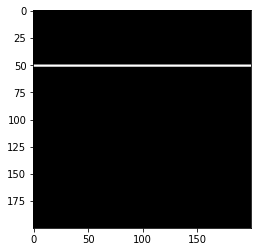

In [ ]:
images = torch.IntTensor(100, 200, 200, 3).zero_() #1

for i, image in enumerate(images): #2
  image[2*i:2*i+2] = 255
plt.imshow(images[25])

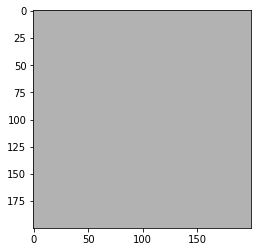

In [ ]:
plt.imshow((images.float().mean(0) * 70).int())

### Задача 4

- В Colab нажмите в меню сверху: `Runtime` -> `Change Runtime Type` -> `GPU`, где изначально стоит `None` (`Среда выполнение` - `Сменить среду выполнения`)
- Объявите тензор `a` размера (2, 3, 4) и тензор `b` размера (1, 8, 3) на GPU, иницилизируйте их случайно равномерно (`.uniform_()`)
- Затем измените форму тензора `b`, чтобы она совпадала с формой тензора `a`, получите тензор `c`  
- Переместите `c` на CPU, переместите `a` на CPU  
- Оберните их в `Variable()`
- Объявите тензор `L = torch.mean((c - a) `**` 2)` и посчитайте градиент `L` по `c` ( то есть $\frac{\partial{L}}{\partial{c}})$
- Выведите градиент `L` по `c`

In [ ]:
a = torch.rand(2, 3, 4).uniform_().cuda()
b = torch.rand(1, 8, 3).uniform_().cuda()
c = b.reshape(a.shape)

print(f'a = {a}\n')
print(f'b = {b}\n')
print(f'c = {c}\n')

a = tensor([[[0.3504, 0.1253, 0.9696, 0.2491],
         [0.4524, 0.8998, 0.8304, 0.0746],
         [0.8391, 0.9148, 0.6507, 0.6999]],

        [[0.0186, 0.2873, 0.0046, 0.7165],
         [0.0754, 0.3231, 0.6588, 0.4172],
         [0.7417, 0.3088, 0.2444, 0.4578]]], device='cuda:0')

b = tensor([[[0.9828, 0.9581, 0.0886],
         [0.8352, 0.8360, 0.7559],
         [0.0589, 0.2146, 0.4446],
         [0.3750, 0.7986, 0.9962],
         [0.5403, 0.7391, 0.8746],
         [0.7613, 0.9441, 0.1973],
         [0.7561, 0.1878, 0.5652],
         [0.7191, 0.4129, 0.2020]]], device='cuda:0')

c = tensor([[[0.9828, 0.9581, 0.0886, 0.8352],
         [0.8360, 0.7559, 0.0589, 0.2146],
         [0.4446, 0.3750, 0.7986, 0.9962]],

        [[0.5403, 0.7391, 0.8746, 0.7613],
         [0.9441, 0.1973, 0.7561, 0.1878],
         [0.5652, 0.7191, 0.4129, 0.2020]]], device='cuda:0')



In [ ]:
c = c.cpu()
a = a.cpu()
print(f'a = {a}\n')
print(f'c = {c}')

a = tensor([[[0.8158, 0.7039, 0.4007, 0.0102],
         [0.2411, 0.1456, 0.6814, 0.1051],
         [0.9437, 0.4628, 0.4492, 0.6189]],

        [[0.4216, 0.1793, 0.7646, 0.7297],
         [0.1370, 0.6698, 0.8598, 0.3569],
         [0.2802, 0.5271, 0.8408, 0.9091]]])

c = tensor([[[0.5404, 0.9386, 0.5500, 0.3648],
         [0.2694, 0.5126, 0.6669, 0.3732],
         [0.6417, 0.5211, 0.6164, 0.7833]],

        [[0.5557, 0.1521, 0.2418, 0.2122],
         [0.9820, 0.6899, 0.1958, 0.3914],
         [0.2201, 0.7542, 0.6680, 0.9338]]])


In [ ]:
from torch.autograd import Variable

a = Variable(a)
c = Variable(c, requires_grad=True)

L = torch.mean((c - a)**2)

print(f'a = {a}\n')
print(f'c = {c}\n')
print(f'L = {L}\n')

L.backward()
print(f'градиент L по c = {c.grad}\n')

a = tensor([[[0.3504, 0.1253, 0.9696, 0.2491],
         [0.4524, 0.8998, 0.8304, 0.0746],
         [0.8391, 0.9148, 0.6507, 0.6999]],

        [[0.0186, 0.2873, 0.0046, 0.7165],
         [0.0754, 0.3231, 0.6588, 0.4172],
         [0.7417, 0.3088, 0.2444, 0.4578]]], device='cuda:0')

c = tensor([[[0.9828, 0.9581, 0.0886, 0.8352],
         [0.8360, 0.7559, 0.0589, 0.2146],
         [0.4446, 0.3750, 0.7986, 0.9962]],

        [[0.5403, 0.7391, 0.8746, 0.7613],
         [0.9441, 0.1973, 0.7561, 0.1878],
         [0.5652, 0.7191, 0.4129, 0.2020]]], device='cuda:0',
       requires_grad=True)

L = 0.24640071392059326

градиент L по c = tensor([[[ 0.0527,  0.0694, -0.0734,  0.0488],
         [ 0.0320, -0.0120, -0.0643,  0.0117],
         [-0.0329, -0.0450,  0.0123,  0.0247]],

        [[ 0.0435,  0.0376,  0.0725,  0.0037],
         [ 0.0724, -0.0105,  0.0081, -0.0191],
         [-0.0147,  0.0342,  0.0140, -0.0213]]], device='cuda:0')

